In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['director'] = df['director'].fillna("Not Specified")
df['cast'] = df['cast'].fillna("Not Specified")
df['country'] = df['country'].fillna("Not Specified")


In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [20]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           4
duration         3
listed_in        0
description      0
year_added      98
dtype: int64

In [25]:
df = df.dropna(subset=['date_added'])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df = df.dropna(subset=['duration'])

In [28]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

Text(0.5, 1.0, 'Count of Movies and TV Shows')

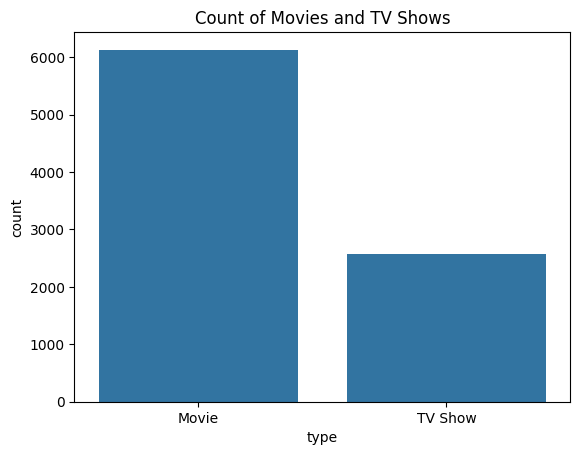

In [29]:
sns.countplot(data=df, x='type')
plt.title("Count of Movies and TV Shows")

<Axes: title={'center': 'Top 10 Countries with Most Content'}, xlabel='country'>

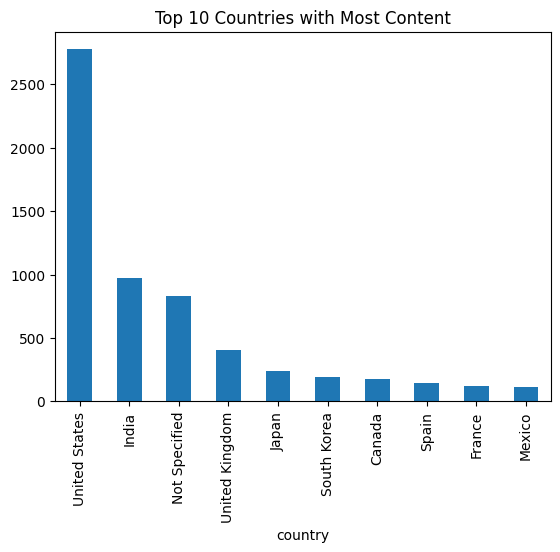

In [30]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Countries with Most Content')

<Axes: title={'center': 'Content Added per Year'}, xlabel='year_added'>

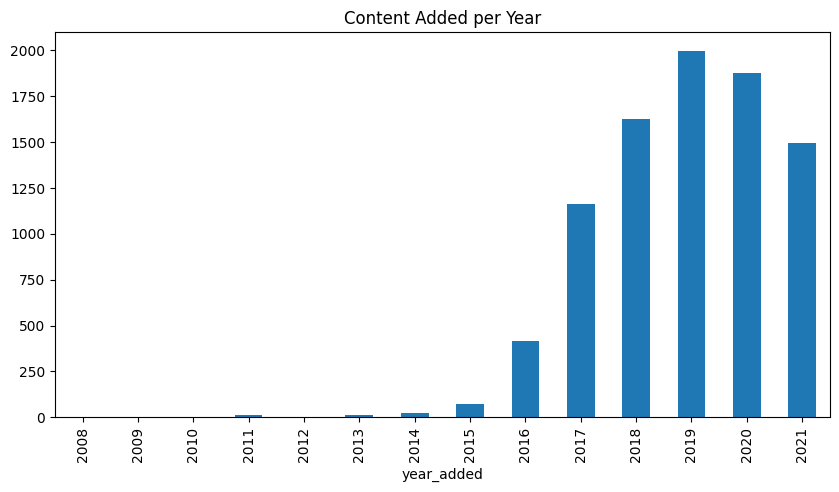

In [31]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), title='Content Added per Year')

Text(0.5, 1.0, 'Distribution of Content Ratings')

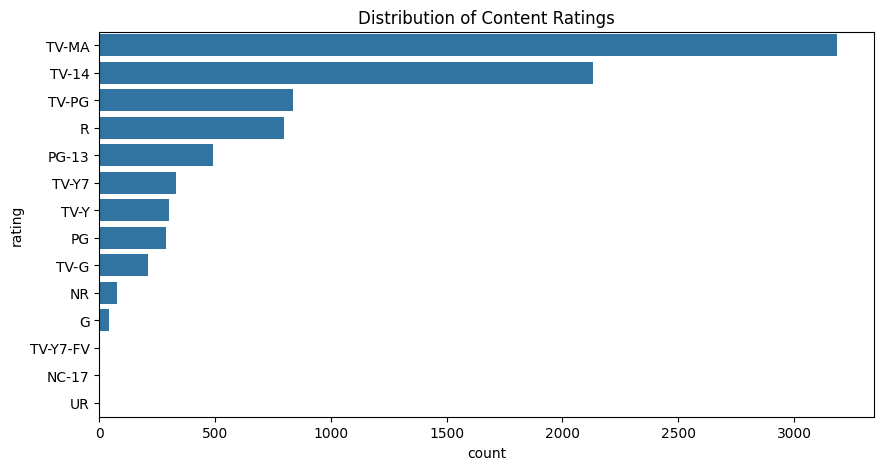

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')

In [33]:
# For movies
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)

# For TV Shows
df_shows = df[df['type'] == 'TV Show'].copy()
df_shows['duration'] = df_shows['duration'].str.replace(' Season[s]?', '', regex=True).astype(float)

<Axes: title={'center': 'Top 10 Directors'}, ylabel='director'>

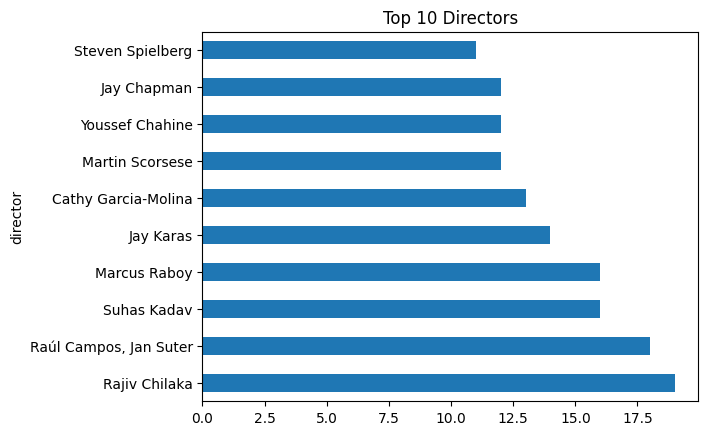

In [34]:
top_directors = df[df['director'] != "Not Specified"]['director'].value_counts().head(10)
top_directors.plot(kind='barh', title='Top 10 Directors')

Text(0.5, 1.0, 'Top 10 Genres on Netflix')

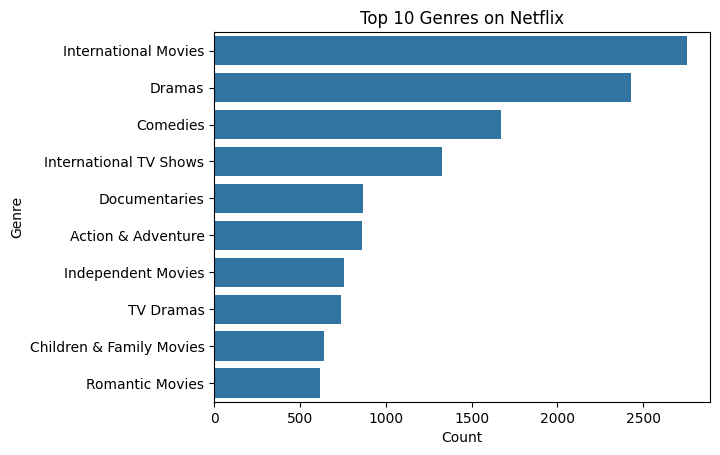

In [35]:
from collections import Counter
genres = ','.join(df['listed_in']).split(',')
genres_count = Counter([genre.strip() for genre in genres])
top_genres = pd.DataFrame(genres_count.most_common(10), columns=['Genre', 'Count'])

sns.barplot(x='Count', y='Genre', data=top_genres)
plt.title('Top 10 Genres on Netflix')

In [37]:
df.to_csv("netflix_titles_cleaned.csv", index=False)